*Import library's*

In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob as tb
import tweepy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob.classifiers import NaiveBayesClassifier
import os, re, nltk, string
from bs4 import BeautifulSoup
from collections import OrderedDict
from operator import itemgetter

*Twitter authentication*

In [2]:
consumer_key = 'Jg95VukOglg6RIqRrqt6GYRoa'
consumer_secret = 'ZvH3Oz7jFN0OvDMXGtRriTqOOykGnUgqxAU0wNKWhMElII0ivq'
access_token = '971179238396227584-KkOSGzCwhzv0lokz55Dkp1wTjyurnkW'
access_token_secret = 'y2NNUWU1tlhQYMOps49aSKgckRqTu7T7dPWpyNbMeXvAA'

In [3]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    alltweets = []
    new_tweets = api.search(screen_name)
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    while len(new_tweets) > 0:
        new_tweets = api.search(screen_name, count=200, max_id=oldest)
        alltweets.extend(new_tweets)
        oldest = alltweets[-1].id - 1
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    return outtweets

*Get all tweets*

In [4]:
public_tweets = get_all_tweets('@falanext')
df = pd.DataFrame(public_tweets, columns=['id','created_at','text'])
df

,id,created_at,text
0,1097941304120619008,2019-02-19 19:29:40,b'@atilalacerda @_GloXavier @Bancointer nao va...
1,1097940852398272512,2019-02-19 19:27:52,"b'@falanext, pior do q ser rejeitado \xc3\xa9 ..."
2,1097939000441139200,2019-02-19 19:20:31,b'O atendimento do @falanext \xc3\xa9 horr\xc...
3,1097937868012560384,2019-02-19 19:16:01,b'Mandei minha proposta pro @falanext s\xc3\xb...
4,1097937688739627008,2019-02-19 19:15:18,b'p\xc3\xa9ssimo atendimento do @falanext pelo...
5,1097934679674667009,2019-02-19 19:03:20,"b'@falanext Oi, chega ai rapidinho. Prometo se..."
6,1097931847550582785,2019-02-19 18:52:05,b'Al\xc3\xb4 @falanext confirmem minha conta n...
7,1097931351720976389,2019-02-19 18:50:07,b'Esse @falanext t\xc3\xa1 me passando \xc3\x...
8,1097931045675118593,2019-02-19 18:48:54,b'@falanext Mais de 40 minutos no telefone e n...
9,1097929454381346816,2019-02-19 18:42:35,b'@falanext Eu n\xc3\xa3o consegui depositar d...


*Data Cleaning*

In [5]:
def cleanTweets(tweetsDF):
    table = str.maketrans(dict.fromkeys(string.punctuation.replace('@','')))
    # essa regex significa:
    # tudo que conter @ OU http OU terminador de linha seguido de uma palavra OU um espaco OU qualquer outro terminador
    # de linha.
    rePattern1 = '(@|http|\\n)(\w+|\s|\S)'
    formattedTweets = []
    for line in tweetsDF['text']:
        formattedStr = line.decode('utf-8').lower()
        formattedStr = formattedStr.translate(table)
        formattedStr = re.sub(rePattern1, "", formattedStr)  
        formattedTweets.append(formattedStr)
    return formattedTweets

formattedTweets = cleanTweets(df)
data = pd.DataFrame(formattedTweets, columns=['text'])
data

,text
0,nao vai pro nao foi o pior banco q ja tive...
1,pior do q ser rejeitado é ficar esperando por...
2,o atendimento do é horrível
3,mandei minha proposta pro só para pagar ingre...
4,péssimo atendimento do pelo telefone sempre a...
5,oi chega ai rapidinho prometo ser a última do...
6,alô confirmem minha conta no app por favor ob...
7,esse tá me passando ódio
8,mais de 40 minutos no telefone e nada de aten...
9,eu não consegui depositar dinheiro na sextafe...


*Stopwords in portuguese*

In [6]:
stopwords = nltk.corpus.stopwords.words('portuguese')
# Inclusão de novas stopwords 
stopwords.append('tô')
stopwords.append('tá')
stopwords.append('pra')
stopwords.append('pro')
stopwords.append('é')
stopwords.append('aí')
stopwords.append('ser')
stopwords.append('pq')
stopwords.append('já')
stopwords.append('nao')
stopwords.append('rt')
stopwords.append('porque')
stopwords.append('vai')
stopwords.append('vou')
stopwords.append('faço')
stopwords.append('dm')
stopwords.append('q')
stopwords.append('faz')
stopwords.append('dá')
stopwords.append('assim')
stopwords.append('agora')
stopwords.append('nada')
stopwords.append('tbm')

*WordCloud*

Text(0.5,1,'Tweets WordCloud - atendimento')

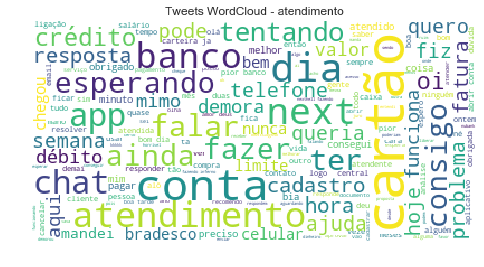

In [7]:
text = " ".join(tweet for tweet in data['text'])
plt.style.use('seaborn')
wordcloud = WordCloud(max_font_size = 50, stopwords = stopwords, background_color = 'white').generate(text)
wordcloud.to_file("nouns_user.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Tweets WordCloud - atendimento')

*Basic statistics about the data*

In [8]:
def word_count(str):
    counts = OrderedDict()
    words = str.split()
    for word in words:
        if word not in stopwords:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
    return counts

print("There are {} words in the combination of all tweets.".format(len(text)))

counts = sorted(word_count(text).items(), key = itemgetter(1), reverse = True)
display(counts[:10])

There are 55302 words in the combination of all tweets.


[('cartão', 110),
 ('conta', 90),
 ('next', 66),
 ('banco', 49),
 ('atendimento', 49),
 ('chat', 41),
 ('dia', 35),
 ('app', 34),
 ('esperando', 31),
 ('ter', 30)]

*Transform occurrences in a dataframe*

In [9]:
wordcount = pd.DataFrame(counts, columns=['word', 'counts'])
top10 = wordcount[:10]
top10

,word,counts
0,cartão,110
1,conta,90
2,next,66
3,banco,49
4,atendimento,49
5,chat,41
6,dia,35
7,app,34
8,esperando,31
9,ter,30


*Top 10 most used words*

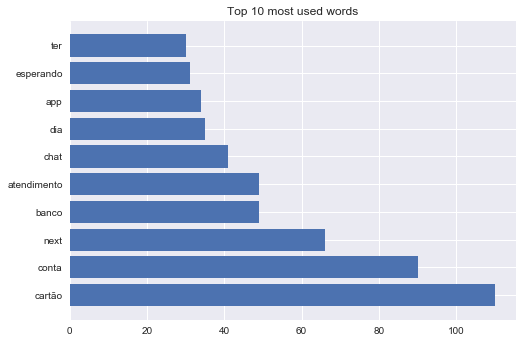

In [10]:
# Dataset
plt.style.use('seaborn')
height = top10.counts
bars = top10.word
y_pos = np.arange(len(bars))
fig = plt.figure()
 
# Create horizontal bars
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

# Create title
plt.title('Top 10 most used words')
 
# Show graphic
plt.show()

In [11]:
# Save graph into a file
fig.savefig('most_used_words.png', bbox_inches='tight', pad_inches=0.1)

*ReLi Lexicon - portuguese sentimental analysis*

In [36]:
base_path = '/Users/gayr/documents/gabriela/mba/tcc/ReLi-Lex'
allData = []
files = [os.path.join(base_path, f) for f in os.listdir(base_path)]
for file in files:
    t = 'pos' if '_Positivos' in file else 'neg'
    with open(file, 'r', encoding = 'latin-1') as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            allData.append((w[1:-1], t))
allDataDF = pd.DataFrame(allData, columns=['word', 'sentiment'])

*Validate the model and avoid overfit*

Functions

In [37]:
# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# A random forest classifier
from sklearn.ensemble import RandomForestClassifier
# A naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
# A boosting classifier
from sklearn.ensemble import AdaBoostClassifier
# Encode labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
# Accuracy classification score
from sklearn.metrics import accuracy_score
# This classifier is useful as a simple baseline to compare with other (real) classifiers
from sklearn.dummy import DummyClassifier

Original Variables

In [38]:
X_original = allDataDF.word
Y_original = allDataDF.sentiment

O sklearn precisa que as variáveis independentes sejam contínuas - por esse motivo precisaremos transformar palavras em números

In [39]:
le_x = LabelEncoder()
X_labelEncoded = le_x.fit_transform(X_original)
le_y = LabelEncoder()
Y_labelEncoded = le_y.fit_transform(Y_original)

In [40]:
zippedEncoded = list(zip(X_labelEncoded, Y_labelEncoded))
dfEncoded = pd.DataFrame(zippedEncoded, columns = ['word', 'sentiment'])

Cross Validation - Divisão da amostra entre treino e teste - scikitlearn

In [41]:
X_labelEncodedDF = dfEncoded.word
Y_labelEncodedDF = dfEncoded.sentiment
X_train, X_test, y_train, y_test = train_test_split(X_labelEncodedDF, Y_labelEncodedDF, test_size=0.30, random_state = 13)

*Classification Models*

Random Forest Classifier

In [42]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = rf.predict(X_test.values.reshape(-1, 1))

Naive Bayes Classifier

In [43]:
nb = MultinomialNB()
nb.fit(X_train.values.reshape(-1, 1), y_train)
y_nb_pred = nb.predict(X_test.values.reshape(-1, 1))

Boosting Classifier

In [44]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train.values.reshape(-1, 1), y_train)
y_clf_pred = clf.predict(X_test.values.reshape(-1, 1))

Dummy Model

In [45]:
dm = DummyClassifier()
dm.fit(X_train.values.reshape(-1, 1), y_train)
y_dummy_pred = dm.predict(X_test.values.reshape(-1, 1))

*Model´s Accuracy*

In [46]:
print('Accuracy random forest on test dataset: {}'.format(round(accuracy_score(y_test, y_pred), 2)))
print('Accuracy naive bayes on test dataset: {}'.format(round(accuracy_score(y_test, y_nb_pred), 2)))
print('Accuracy boosting on test dataset: {}'.format(round(accuracy_score(y_test, y_clf_pred), 2)))
print('Accuracy dummy model on test dataset: {}'.format(round(accuracy_score(y_test, y_dummy_pred), 2)))

Accuracy random forest on test dataset: 0.63
Accuracy naive bayes on test dataset: 0.62
Accuracy boosting on test dataset: 0.62
Accuracy dummy model on test dataset: 0.57


A seguir, iremos utilizar o algoritmo para classificação Random Forest para a análise de sentimentos, devido ao melhor nível de acurácia apresentado.

In [47]:
# tweetsDataLabelEncoder = LabelEncoder()
tweet_text = data.text
tweetsEncoded = le_x.fit_transform(tweet_text)
y_pred_total = rf.predict(tweetsEncoded.reshape(-1, 1))
y_pred_total_decoded = le_y.inverse_transform(y_pred_total)
data['sentiment'] = y_pred_total_decoded
display(data[:10])

C:\Users\GAYR\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,text,sentiment
0,nao vai pro nao foi o pior banco q ja tive...,pos
1,pior do q ser rejeitado é ficar esperando por...,neg
2,o atendimento do é horrível,pos
3,mandei minha proposta pro só para pagar ingre...,pos
4,péssimo atendimento do pelo telefone sempre a...,pos
5,oi chega ai rapidinho prometo ser a última do...,pos
6,alô confirmem minha conta no app por favor ob...,pos
7,esse tá me passando ódio,pos
8,mais de 40 minutos no telefone e nada de aten...,pos
9,eu não consegui depositar dinheiro na sextafe...,pos


*Counting positives and negatives*

In [48]:
df = data.groupby('sentiment').count()
df

,text
sentiment,
neg,247
pos,560


*Sentimental Analysis Graph based on Naive-Bayes Classification*

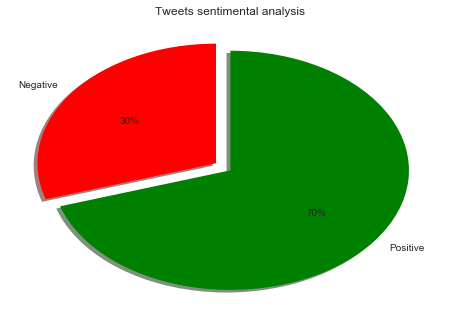

In [25]:
plt.style.use('seaborn')
pie_pos = df.loc['pos']
pie_neg = df.loc['neg']
fig = plt.figure()

slices = [pie_neg, pie_pos]
tweets = ['Negative', 'Positive']
columns = ['Red', 'Green']

plt.title('Tweets sentimental analysis')
 
plt.pie(slices, labels = tweets, colors = columns, startangle = 90, shadow = True, explode = (0.1, 0), autopct='%1.0f%%')

plt.show()

In [26]:
# Save graph into a file
fig.savefig("tweets_sentimental_analysis.png")

*Positive WordCloud*

In [31]:
# filtrar dataframe com tweets positivos
data_pos_filtered = data[data['sentiment'] == 'pos']
data_pos_filtered

,text,sentiment
0,nao vai pro nao foi o pior banco q ja tive...,pos
2,o atendimento do é horrível,pos
3,mandei minha proposta pro só para pagar ingre...,pos
4,péssimo atendimento do pelo telefone sempre a...,pos
5,oi chega ai rapidinho prometo ser a última do...,pos
6,alô confirmem minha conta no app por favor ob...,pos
7,esse tá me passando ódio,pos
9,eu não consegui depositar dinheiro na sextafe...,pos
13,olá ninguém consegue responder no chat varias...,pos
14,tira uma dúvida quanto tempo demora a análise...,pos


*Save positive tweets in a csv file*

In [30]:
data_pos_filtered.to_csv("positive_tweets.csv", index = False, sep=';', encoding='utf-16')

PermissionError: [Errno 13] Permission denied: 'positive_tweets.csv'

*Like mask*

In [ ]:
from PIL import Image
like_mask = np.array(Image.open("c:/Users/GAYR/Documents/Gabriela/MBA/tcc/images/like.png"))
like_mask

*Transform the mask*

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_like_mask = np.ndarray((like_mask.shape[0],like_mask.shape[1]), np.int32)

for i in range(len(like_mask)):
    transformed_like_mask[i] = list(map(transform_format, like_mask[i]))

In [ ]:
# Check the expected result of your mask
transformed_like_mask

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_like_mask,
               stopwords=stopwords, contour_width=1, contour_color='white')

In [ ]:
# WordCloud
plt.style.use('seaborn')
data_pos_filtered = " ".join(tweet for tweet in data_pos_filtered['text'])
wordcloud = WordCloud(max_font_size = 50, stopwords = stopwords, background_color = 'white').generate(text)
wordcloud.to_file("nouns_user_pos.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Positive Tweets WordCloud')

In [ ]:
# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("c:/Users/GAYR/Documents/Gabriela/MBA/tcc/images/likecloud.png")

# show
plt.figure(figsize=[15,6])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Tweets WordCloud')
plt.show()

*Top 10 most used words in positive tweets*

In [ ]:
count_pos = sorted(word_count(data_pos_filtered).items(), key = itemgetter(1), reverse = True)
wordcount_pos = pd.DataFrame(count_pos, columns=['word', 'counts'])
top10_pos = wordcount_pos[:10]
top10_pos

In [ ]:
# Dataset
plt.style.use('seaborn')
height = top10_pos.counts
bars = top10_pos.word
y_pos = np.arange(len(bars))
fig = plt.figure()
 
# Create horizontal bars
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

# Create title
plt.title('Top 10 most used words in positive tweets')
 
# Show graphic
plt.show()

In [ ]:
# Save graph into a file
fig.savefig("most_used_positive_words.png")

*Negative WordCloud*

In [ ]:
# filtrar dataframe com tweets positivos
data_neg_filtered = data[data['sentiment'] == 'neg']
data_neg_filtered

*Save negative tweets in a csv file*

In [ ]:
data_neg_filtered.to_csv("negative_tweets.csv", index = False, sep=';', encoding='utf-16')

*Dislike mask*

In [ ]:
from PIL import Image
dislike_mask = np.array(Image.open("c:/Users/GAYR/Documents/Gabriela/MBA/tcc/images/dislike.png"))
dislike_mask

*Transform the mask*

In [ ]:
def transform_format(val):
    if val == 1:
        return 255
    else:
        return val

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_dislike_mask = np.ndarray((dislike_mask.shape[0],dislike_mask.shape[1]), np.int32)

for i in range(len(dislike_mask)):
    transformed_dislike_mask[i] = list(map(transform_format, dislike_mask[i]))

In [ ]:
# Check the expected result of your mask
transformed_dislike_mask

In [ ]:
# Create a word cloud image
wc_dislike = WordCloud(background_color="white", max_words=1000, mask=transformed_dislike_mask,
               stopwords=stopwords, contour_width=1, contour_color='white')

In [ ]:
# WordCloud
plt.style.use('seaborn')
data_neg_filtered = " ".join(tweet for tweet in data_neg_filtered['text'])
wordcloud = WordCloud(max_font_size = 50, stopwords = stopwords, background_color = 'white').generate(text)
wordcloud.to_file("nouns_user_neg.png")
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Negative Tweets WordCloud')

In [ ]:
# Generate a wordcloud
wc_dislike.generate(text)

# store to file
wc_dislike.to_file("c:/Users/GAYR/Documents/Gabriela/MBA/tcc/images/dislikecloud.png")

# show
plt.figure(figsize=[12,5])
plt.imshow(wc_dislike, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Tweets WordCloud')
plt.show()

*Top 10 most used words in negative tweets*

In [ ]:
count_neg = sorted(word_count(data_neg_filtered).items(), key = itemgetter(1), reverse = True)
wordcount_neg = pd.DataFrame(count_neg, columns=['word', 'counts'])
top10_neg = wordcount_neg[:10]
top10_neg

In [ ]:
# Dataset
plt.style.use('seaborn')
height = top10_neg.counts
bars = top10_neg.word
y_pos = np.arange(len(bars))
fig = plt.figure()
 
# Create horizontal bars
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

# Create title
plt.title('Top 10 most used words in negative tweets')
 
# Show graphic
plt.show()

In [ ]:
# Save into a file
fig.savefig("most_used_negative_words.png")